# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).
### 0. Install the Environment


The Project use the MLAngents version 0.4.0 so we need to do some following steps
#### Create virtual environment using conda

```
# Create the virtual env DQN
conda create -n DQN_navigation python=3.6
# activate environment
source activate DQN_navigation
```
#### Install all dependence
```
# clone the udacity repo
git clone https://github.com/udacity/deep-reinforcement-learning.git

# go to the python folder of the repo
cd deep-reinforcement-learning/python

# install the unityagents package from this folder
pip install -e .

# install the requirements from our package
cd PATH_TO_OUR_PACKAGE
pip install -r requirements.txt

```
#### Create and Adding Kernel to Jupyter notebook
```
conda install -c anaconda ipykernel
python -m ipykernel install  --user --name=DQN_navigation
```
Open Jupyter notebok. Go to ```Kernel/Change Kernel/DQN_navigation```





### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 5. DQN Algorithms
Implement the DQN Algorithms

In [6]:

from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0)

Episode 100	Average Score: 8.41
Episode 100	Average Score: 8.35
Episode 100	Average Score: 8.29
Episode 100	Average Score: 8.23
Episode 100	Average Score: 8.17
Episode 100	Average Score: 8.10
Episode 100	Average Score: 8.03
Episode 100	Average Score: 7.96
Episode 100	Average Score: 7.89
Episode 100	Average Score: 7.82
Episode 100	Average Score: 7.75
Episode 100	Average Score: 7.68
Episode 100	Average Score: 7.61
Episode 100	Average Score: 7.54
Episode 100	Average Score: 7.47
Episode 100	Average Score: 7.40
Episode 100	Average Score: 7.33
Episode 100	Average Score: 7.26
Episode 100	Average Score: 7.19
Episode 100	Average Score: 7.12
Episode 100	Average Score: 7.05
Episode 100	Average Score: 6.98
Episode 100	Average Score: 6.91
Episode 100	Average Score: 6.84
Episode 100	Average Score: 6.77
Episode 100	Average Score: 6.70
Episode 100	Average Score: 6.63
Episode 100	Average Score: 6.56
Episode 100	Average Score: 6.49
Episode 100	Average Score: 6.42
Episode 100	Average Score: 6.35
Episode 

Episode 100	Average Score: 4.81
Episode 100	Average Score: 4.86
Episode 100	Average Score: 4.91
Episode 100	Average Score: 4.96
Episode 100	Average Score: 5.01
Episode 100	Average Score: 5.06
Episode 100	Average Score: 5.11
Episode 100	Average Score: 5.16
Episode 100	Average Score: 5.21
Episode 100	Average Score: 5.26
Episode 100	Average Score: 5.31
Episode 100	Average Score: 5.36
Episode 100	Average Score: 5.40
Episode 100	Average Score: 5.44
Episode 100	Average Score: 5.48
Episode 100	Average Score: 5.52
Episode 100	Average Score: 5.56
Episode 200	Average Score: 5.443
Episode 200	Average Score: 5.40
Episode 200	Average Score: 5.36
Episode 200	Average Score: 5.32
Episode 200	Average Score: 5.28
Episode 200	Average Score: 5.24
Episode 200	Average Score: 5.21
Episode 200	Average Score: 5.18
Episode 200	Average Score: 5.15
Episode 200	Average Score: 5.11
Episode 200	Average Score: 5.07
Episode 200	Average Score: 5.03
Episode 200	Average Score: 4.99
Episode 200	Average Score: 4.95
Episode

Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 200	Average Score: 1.00
Episode 

Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 300	Average Score: 8.00
Episode 

Episode 400	Average Score: 5.78
Episode 400	Average Score: 5.79
Episode 400	Average Score: 5.80
Episode 400	Average Score: 5.81
Episode 400	Average Score: 5.82
Episode 400	Average Score: 5.83
Episode 400	Average Score: 5.84
Episode 400	Average Score: 5.85
Episode 400	Average Score: 5.86
Episode 400	Average Score: 5.87
Episode 400	Average Score: 5.88
Episode 400	Average Score: 5.89
Episode 400	Average Score: 5.90
Episode 400	Average Score: 5.91
Episode 400	Average Score: 5.92
Episode 400	Average Score: 5.93
Episode 400	Average Score: 5.94
Episode 400	Average Score: 5.95
Episode 400	Average Score: 5.96
Episode 400	Average Score: 5.97
Episode 400	Average Score: 5.98
Episode 400	Average Score: 5.99
Episode 400	Average Score: 6.00
Episode 400	Average Score: 6.00
Episode 400	Average Score: 6.00
Episode 400	Average Score: 6.00
Episode 400	Average Score: 6.00
Episode 400	Average Score: 6.00
Episode 400	Average Score: 6.00
Episode 400	Average Score: 6.00
Episode 400	Average Score: 6.00
Episode 

Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 500	Average Score: 1.00
Episode 

Episode 600	Average Score: 1.08
Episode 600	Average Score: 1.11
Episode 600	Average Score: 1.14
Episode 600	Average Score: 1.17
Episode 600	Average Score: 1.20
Episode 600	Average Score: 1.23
Episode 600	Average Score: 1.26
Episode 600	Average Score: 1.29
Episode 600	Average Score: 1.32
Episode 600	Average Score: 1.35
Episode 600	Average Score: 1.38
Episode 600	Average Score: 1.41
Episode 600	Average Score: 1.44
Episode 600	Average Score: 1.47
Episode 600	Average Score: 1.50
Episode 600	Average Score: 1.53
Episode 600	Average Score: 1.56
Episode 600	Average Score: 1.59
Episode 600	Average Score: 1.62
Episode 600	Average Score: 1.64
Episode 600	Average Score: 1.66
Episode 600	Average Score: 1.68
Episode 600	Average Score: 1.70
Episode 600	Average Score: 1.72
Episode 600	Average Score: 1.74
Episode 600	Average Score: 1.76
Episode 600	Average Score: 1.78
Episode 600	Average Score: 1.80
Episode 600	Average Score: 1.82
Episode 600	Average Score: 1.85
Episode 600	Average Score: 1.88
Episode 

Episode 700	Average Score: 2.28
Episode 700	Average Score: 2.20
Episode 700	Average Score: 2.12
Episode 700	Average Score: 2.04
Episode 700	Average Score: 1.96
Episode 700	Average Score: 1.88
Episode 700	Average Score: 1.80
Episode 700	Average Score: 1.72
Episode 700	Average Score: 1.64
Episode 700	Average Score: 1.56
Episode 700	Average Score: 1.48
Episode 700	Average Score: 1.39
Episode 700	Average Score: 1.30
Episode 700	Average Score: 1.21
Episode 700	Average Score: 1.12
Episode 700	Average Score: 1.03
Episode 700	Average Score: 0.93
Episode 700	Average Score: 0.83
Episode 700	Average Score: 0.72
Episode 700	Average Score: 0.62
Episode 700	Average Score: 0.52
Episode 700	Average Score: 0.42
Episode 700	Average Score: 0.31
Episode 700	Average Score: 0.33
Episode 700	Average Score: 0.35
Episode 700	Average Score: 0.37
Episode 700	Average Score: 0.39
Episode 700	Average Score: 0.41
Episode 700	Average Score: 0.43
Episode 700	Average Score: 0.45
Episode 700	Average Score: 0.47
Episode 

Episode 800	Average Score: 4.09
Episode 800	Average Score: 4.06
Episode 800	Average Score: 4.04
Episode 800	Average Score: 4.02
Episode 800	Average Score: 4.00
Episode 800	Average Score: 3.98
Episode 800	Average Score: 3.96
Episode 800	Average Score: 3.94
Episode 800	Average Score: 3.92
Episode 800	Average Score: 3.90
Episode 800	Average Score: 3.89
Episode 800	Average Score: 3.88
Episode 800	Average Score: 3.87
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 800	Average Score: 3.86
Episode 

Episode 800	Average Score: 13.74
Episode 800	Average Score: 13.76
Episode 800	Average Score: 13.78
Episode 800	Average Score: 13.80
Episode 800	Average Score: 13.82
Episode 800	Average Score: 13.84
Episode 900	Average Score: 10.10
Episode 900	Average Score: 10.02
Episode 900	Average Score: 9.94
Episode 900	Average Score: 9.85
Episode 900	Average Score: 9.77
Episode 900	Average Score: 9.69
Episode 900	Average Score: 9.61
Episode 900	Average Score: 9.53
Episode 900	Average Score: 9.45
Episode 900	Average Score: 9.37
Episode 900	Average Score: 9.29
Episode 900	Average Score: 9.21
Episode 900	Average Score: 9.13
Episode 900	Average Score: 9.05
Episode 900	Average Score: 8.96
Episode 900	Average Score: 8.87
Episode 900	Average Score: 8.78
Episode 900	Average Score: 8.69
Episode 900	Average Score: 8.60
Episode 900	Average Score: 8.51
Episode 900	Average Score: 8.42
Episode 900	Average Score: 8.33
Episode 900	Average Score: 8.24
Episode 900	Average Score: 8.16
Episode 900	Average Score: 8.08


Episode 900	Average Score: 11.88
Episode 900	Average Score: 11.92
Episode 900	Average Score: 11.96
Episode 900	Average Score: 12.00
Episode 900	Average Score: 12.03
Episode 900	Average Score: 12.06
Episode 900	Average Score: 12.09
Episode 900	Average Score: 12.12
Episode 900	Average Score: 12.15
Episode 900	Average Score: 12.18
Episode 900	Average Score: 12.21
Episode 900	Average Score: 12.24
Episode 900	Average Score: 12.27
Episode 900	Average Score: 12.30
Episode 900	Average Score: 12.33
Episode 900	Average Score: 12.36
Episode 900	Average Score: 12.39
Episode 900	Average Score: 12.42
Episode 900	Average Score: 12.45
Episode 900	Average Score: 12.47
Episode 900	Average Score: 12.49
Episode 900	Average Score: 12.51
Episode 900	Average Score: 12.53
Episode 900	Average Score: 12.55
Episode 900	Average Score: 12.57
Episode 900	Average Score: 12.59
Episode 1000	Average Score: 1.28
Episode 1000	Average Score: 1.27
Episode 1000	Average Score: 1.26
Episode 1000	Average Score: 1.25
Episode 10

Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 1000	Average Score: 7.00
Episode 10

Episode 1100	Average Score: 8.76
Episode 1100	Average Score: 8.83
Episode 1100	Average Score: 8.89
Episode 1100	Average Score: 8.95
Episode 1100	Average Score: 9.01
Episode 1100	Average Score: 9.07
Episode 1100	Average Score: 9.13
Episode 1100	Average Score: 9.19
Episode 1100	Average Score: 9.25
Episode 1100	Average Score: 9.31
Episode 1100	Average Score: 9.37
Episode 1100	Average Score: 9.43
Episode 1100	Average Score: 9.49
Episode 1100	Average Score: 9.55
Episode 1100	Average Score: 9.61
Episode 1100	Average Score: 9.66
Episode 1100	Average Score: 9.71
Episode 1100	Average Score: 9.76
Episode 1100	Average Score: 9.81
Episode 1100	Average Score: 9.86
Episode 1100	Average Score: 9.91
Episode 1100	Average Score: 9.96
Episode 1100	Average Score: 10.01
Episode 1100	Average Score: 10.06
Episode 1100	Average Score: 10.11
Episode 1100	Average Score: 10.16
Episode 1100	Average Score: 10.21
Episode 1100	Average Score: 10.26
Episode 1100	Average Score: 10.31
Episode 1100	Average Score: 10.36
Ep

Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 1200	Average Score: 2.00
Episode 12

Episode 1300	Average Score: 0.72
Episode 1300	Average Score: 0.77
Episode 1300	Average Score: 0.82
Episode 1300	Average Score: 0.87
Episode 1300	Average Score: 0.93
Episode 1300	Average Score: 0.99
Episode 1300	Average Score: 1.05
Episode 1300	Average Score: 1.11
Episode 1300	Average Score: 1.17
Episode 1300	Average Score: 1.23
Episode 1300	Average Score: 1.29
Episode 1300	Average Score: 1.35
Episode 1300	Average Score: 1.41
Episode 1300	Average Score: 1.47
Episode 1300	Average Score: 1.53
Episode 1300	Average Score: 1.59
Episode 1300	Average Score: 1.65
Episode 1300	Average Score: 1.71
Episode 1300	Average Score: 1.77
Episode 1300	Average Score: 1.83
Episode 1300	Average Score: 1.89
Episode 1300	Average Score: 1.95
Episode 1300	Average Score: 2.01
Episode 1300	Average Score: 2.07
Episode 1300	Average Score: 2.13
Episode 1300	Average Score: 2.19
Episode 1300	Average Score: 2.25
Episode 1300	Average Score: 2.31
Episode 1300	Average Score: 2.37
Episode 1300	Average Score: 2.43
Episode 13

Episode 1400	Average Score: 6.87
Episode 1400	Average Score: 6.73
Episode 1400	Average Score: 6.59
Episode 1400	Average Score: 6.45
Episode 1400	Average Score: 6.31
Episode 1400	Average Score: 6.16
Episode 1400	Average Score: 6.02
Episode 1400	Average Score: 5.88
Episode 1400	Average Score: 5.74
Episode 1400	Average Score: 5.60
Episode 1400	Average Score: 5.46
Episode 1400	Average Score: 5.32
Episode 1400	Average Score: 5.18
Episode 1400	Average Score: 5.04
Episode 1400	Average Score: 4.90
Episode 1400	Average Score: 4.76
Episode 1400	Average Score: 4.62
Episode 1400	Average Score: 4.49
Episode 1400	Average Score: 4.36
Episode 1400	Average Score: 4.23
Episode 1400	Average Score: 4.10
Episode 1400	Average Score: 3.97
Episode 1400	Average Score: 3.84
Episode 1400	Average Score: 3.71
Episode 1400	Average Score: 3.58
Episode 1400	Average Score: 3.45
Episode 1400	Average Score: 3.32
Episode 1400	Average Score: 3.19
Episode 1400	Average Score: 3.07
Episode 1400	Average Score: 2.95
Episode 14

Episode 1500	Average Score: 10.41
Episode 1500	Average Score: 10.34
Episode 1500	Average Score: 10.27
Episode 1500	Average Score: 10.20
Episode 1500	Average Score: 10.13
Episode 1500	Average Score: 10.06
Episode 1500	Average Score: 9.99
Episode 1500	Average Score: 9.92
Episode 1500	Average Score: 9.85
Episode 1500	Average Score: 9.78
Episode 1500	Average Score: 9.71
Episode 1500	Average Score: 9.62
Episode 1500	Average Score: 9.53
Episode 1500	Average Score: 9.44
Episode 1500	Average Score: 9.35
Episode 1500	Average Score: 9.26
Episode 1500	Average Score: 9.17
Episode 1500	Average Score: 9.08
Episode 1500	Average Score: 8.99
Episode 1500	Average Score: 8.90
Episode 1500	Average Score: 8.81
Episode 1500	Average Score: 8.72
Episode 1500	Average Score: 8.63
Episode 1500	Average Score: 8.54
Episode 1500	Average Score: 8.45
Episode 1500	Average Score: 8.36
Episode 1500	Average Score: 8.27
Episode 1500	Average Score: 8.18
Episode 1500	Average Score: 8.08
Episode 1500	Average Score: 7.99
Epis

Episode 1500	Average Score: 5.55
Episode 1500	Average Score: 5.57
Episode 1500	Average Score: 5.59
Episode 1500	Average Score: 5.61
Episode 1500	Average Score: 5.62
Episode 1500	Average Score: 5.63
Episode 1500	Average Score: 5.64
Episode 1500	Average Score: 5.65
Episode 1500	Average Score: 5.66
Episode 1500	Average Score: 5.67
Episode 1500	Average Score: 5.68
Episode 1500	Average Score: 5.69
Episode 1500	Average Score: 5.70
Episode 1500	Average Score: 5.71
Episode 1500	Average Score: 5.72
Episode 1500	Average Score: 5.73
Episode 1500	Average Score: 5.74
Episode 1500	Average Score: 5.75
Episode 1500	Average Score: 5.76
Episode 1500	Average Score: 5.77
Episode 1500	Average Score: 5.78
Episode 1500	Average Score: 5.79
Episode 1500	Average Score: 5.80
Episode 1500	Average Score: 5.81
Episode 1500	Average Score: 5.82
Episode 1500	Average Score: 5.83
Episode 1500	Average Score: 5.84
Episode 1500	Average Score: 5.85
Episode 1500	Average Score: 5.86
Episode 1500	Average Score: 5.87
Episode 15

Episode 1600	Average Score: 5.44
Episode 1600	Average Score: 5.48
Episode 1600	Average Score: 5.52
Episode 1600	Average Score: 5.56
Episode 1600	Average Score: 5.60
Episode 1600	Average Score: 5.64
Episode 1600	Average Score: 5.68
Episode 1600	Average Score: 5.72
Episode 1600	Average Score: 5.76
Episode 1600	Average Score: 5.80
Episode 1600	Average Score: 5.84
Episode 1600	Average Score: 5.88
Episode 1600	Average Score: 5.92
Episode 1600	Average Score: 5.96
Episode 1600	Average Score: 6.00
Episode 1600	Average Score: 6.04
Episode 1600	Average Score: 6.08
Episode 1600	Average Score: 6.12
Episode 1600	Average Score: 6.16
Episode 1600	Average Score: 6.20
Episode 1600	Average Score: 6.24
Episode 1600	Average Score: 6.28
Episode 1600	Average Score: 6.32
Episode 1600	Average Score: 6.36
Episode 1600	Average Score: 6.40
Episode 1600	Average Score: 6.44
Episode 1600	Average Score: 6.48
Episode 1600	Average Score: 6.52
Episode 1600	Average Score: 6.56
Episode 1600	Average Score: 6.61
Episode 16

Episode 1700	Average Score: 9.59
Episode 1700	Average Score: 9.65
Episode 1700	Average Score: 9.71
Episode 1700	Average Score: 9.77
Episode 1700	Average Score: 9.83
Episode 1700	Average Score: 9.89
Episode 1700	Average Score: 9.95
Episode 1700	Average Score: 10.00
Episode 1700	Average Score: 10.05
Episode 1700	Average Score: 10.10
Episode 1700	Average Score: 10.15
Episode 1700	Average Score: 10.20
Episode 1700	Average Score: 10.25
Episode 1700	Average Score: 10.30
Episode 1700	Average Score: 10.35
Episode 1700	Average Score: 10.40
Episode 1700	Average Score: 10.46
Episode 1700	Average Score: 10.52
Episode 1700	Average Score: 10.57
Episode 1700	Average Score: 10.62
Episode 1700	Average Score: 10.67
Episode 1700	Average Score: 10.72
Episode 1700	Average Score: 10.77
Episode 1700	Average Score: 10.82
Episode 1700	Average Score: 10.86
Episode 1700	Average Score: 10.90
Episode 1700	Average Score: 10.94
Episode 1700	Average Score: 10.98
Episode 1700	Average Score: 11.02
Episode 1700	Average 

Episode 1800	Average Score: 0.67
Episode 1800	Average Score: 0.70
Episode 1800	Average Score: 0.73
Episode 1800	Average Score: 0.76
Episode 1800	Average Score: 0.79
Episode 1800	Average Score: 0.82
Episode 1800	Average Score: 0.85
Episode 1800	Average Score: 0.88
Episode 1800	Average Score: 0.91
Episode 1800	Average Score: 0.94
Episode 1800	Average Score: 0.97
Episode 1800	Average Score: 1.01
Episode 1800	Average Score: 1.05
Episode 1800	Average Score: 1.09
Episode 1800	Average Score: 1.13
Episode 1800	Average Score: 1.17
Episode 1800	Average Score: 1.21
Episode 1800	Average Score: 1.25
Episode 1800	Average Score: 1.29
Episode 1800	Average Score: 1.33
Episode 1800	Average Score: 1.37
Episode 1800	Average Score: 1.41
Episode 1800	Average Score: 1.45
Episode 1800	Average Score: 1.49
Episode 1800	Average Score: 1.54
Episode 1800	Average Score: 1.59
Episode 1800	Average Score: 1.64
Episode 1800	Average Score: 1.69
Episode 1800	Average Score: 1.74
Episode 1800	Average Score: 1.79
Episode 18

Episode 1900	Average Score: 3.60
Episode 1900	Average Score: 3.65
Episode 1900	Average Score: 3.70
Episode 1900	Average Score: 3.75
Episode 1900	Average Score: 3.80
Episode 1900	Average Score: 3.85
Episode 1900	Average Score: 3.90
Episode 1900	Average Score: 3.95
Episode 1900	Average Score: 4.00
Episode 1900	Average Score: 4.05
Episode 1900	Average Score: 4.09
Episode 1900	Average Score: 4.13
Episode 1900	Average Score: 4.17
Episode 1900	Average Score: 4.21
Episode 1900	Average Score: 4.24
Episode 1900	Average Score: 4.27
Episode 1900	Average Score: 4.30
Episode 1900	Average Score: 4.33
Episode 1900	Average Score: 4.36
Episode 1900	Average Score: 4.39
Episode 1900	Average Score: 4.42
Episode 1900	Average Score: 4.45
Episode 1900	Average Score: 4.48
Episode 1900	Average Score: 4.51
Episode 1900	Average Score: 4.54
Episode 1900	Average Score: 4.57
Episode 1900	Average Score: 4.60
Episode 1900	Average Score: 4.63
Episode 1900	Average Score: 4.66
Episode 1900	Average Score: 4.69
Episode 19

Episode 2000	Average Score: 2.03
Episode 2000	Average Score: 1.97
Episode 2000	Average Score: 1.91
Episode 2000	Average Score: 1.85
Episode 2000	Average Score: 1.79
Episode 2000	Average Score: 1.73
Episode 2000	Average Score: 1.68
Episode 2000	Average Score: 1.63
Episode 2000	Average Score: 1.58
Episode 2000	Average Score: 1.53
Episode 2000	Average Score: 1.48
Episode 2000	Average Score: 1.43
Episode 2000	Average Score: 1.38
Episode 2000	Average Score: 1.33
Episode 2000	Average Score: 1.28
Episode 2000	Average Score: 1.23
Episode 2000	Average Score: 1.18
Episode 2000	Average Score: 1.14
Episode 2000	Average Score: 1.10
Episode 2000	Average Score: 1.06
Episode 2000	Average Score: 1.02
Episode 2000	Average Score: 0.98
Episode 2000	Average Score: 0.94
Episode 2000	Average Score: 0.90
Episode 2000	Average Score: 0.86
Episode 2000	Average Score: 0.82
Episode 2000	Average Score: 0.78
Episode 2000	Average Score: 0.74
Episode 2000	Average Score: 0.70
Episode 2000	Average Score: 0.73
Episode 20

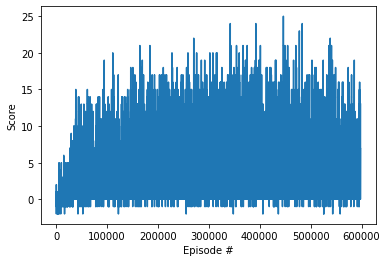

In [7]:

def dqn(n_episodes= 2000, max_t =1000, eps_start=1.0, eps_end= 0.01, eps_decay=0.995):
    
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    #Initilize all the values
   
    scores=[] # Initilize the score of the rewards
    scores_window = deque(maxlen=100)  # last 100 scores
    eps =eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state 
        score=0
        for t in range(1, max_t):
            action =agent.act(state, eps) # based on the epsilon choose the action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # learning step
            state= next_state
            score +=reward
            if done:
                break
            scores_window.append(score)       # save most recent score
            scores.append(score)              # save most recent score
            eps = max(eps_end, eps_decay*eps) # decrease epsilon
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
            if i_episode % 100 == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if np.mean(scores_window)>=200.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
                break
    return scores

scores = dqn()
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


        
        